# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy 

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nova sintra
Processing Record 2 of Set 1 | fisterra
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | plastun
Processing Record 7 of Set 1 | hafar al-batin
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | nallihan
Processing Record 10 of Set 1 | petropavl
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | pariaman
Processing Record 14 of Set 1 | kemise
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | kawthoung
City not found. Skipping...
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | inirida
Processing Record 21 of Set 1 | pali
Processing

Processing Record 40 of Set 4 | magdagachi
Processing Record 41 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 42 of Set 4 | changsu
Processing Record 43 of Set 4 | toba
Processing Record 44 of Set 4 | howard springs
Processing Record 45 of Set 4 | laojunmiao
Processing Record 46 of Set 4 | sodankyla
Processing Record 47 of Set 4 | chakari
Processing Record 48 of Set 4 | al-`ula
City not found. Skipping...
Processing Record 49 of Set 4 | lilongwe
Processing Record 0 of Set 5 | qarauyl
Processing Record 1 of Set 5 | hithadhoo
Processing Record 2 of Set 5 | lospalos
Processing Record 3 of Set 5 | tukrah
Processing Record 4 of Set 5 | danville
Processing Record 5 of Set 5 | dongola
Processing Record 6 of Set 5 | volkhov
Processing Record 7 of Set 5 | el sauzal de rodriguez
Processing Record 8 of Set 5 | i-n-salah
Processing Record 9 of Set 5 | arar
Processing Record 10 of Set 5 | north bend
Processing Record 11 of Set 5 | beipiao
Processing Record 12 of Set 5 | nemuro
P

Processing Record 29 of Set 8 | san andres
Processing Record 30 of Set 8 | klyuchi
Processing Record 31 of Set 8 | shortandy
Processing Record 32 of Set 8 | nerac
Processing Record 33 of Set 8 | kualakapuas
Processing Record 34 of Set 8 | patong
Processing Record 35 of Set 8 | luderitz
Processing Record 36 of Set 8 | wangkui
Processing Record 37 of Set 8 | csorna
Processing Record 38 of Set 8 | gaspe
Processing Record 39 of Set 8 | villanueva
Processing Record 40 of Set 8 | nadi
Processing Record 41 of Set 8 | gadzhiyevo
Processing Record 42 of Set 8 | mae chan
Processing Record 43 of Set 8 | desaguadero
Processing Record 44 of Set 8 | mogadishu
Processing Record 45 of Set 8 | makhambet
Processing Record 46 of Set 8 | san antonio de pale
Processing Record 47 of Set 8 | sao vicente
Processing Record 48 of Set 8 | shijiang
Processing Record 49 of Set 8 | cannonvale
Processing Record 0 of Set 9 | pacific grove
Processing Record 1 of Set 9 | adamovka
Processing Record 2 of Set 9 | kone
Pro

Processing Record 19 of Set 12 | tayshet
Processing Record 20 of Set 12 | kapa'a
Processing Record 21 of Set 12 | labrador city
Processing Record 22 of Set 12 | vuktyl
Processing Record 23 of Set 12 | xiongzhou
Processing Record 24 of Set 12 | zaozersk
Processing Record 25 of Set 12 | novyy urgal
Processing Record 26 of Set 12 | praia
Processing Record 27 of Set 12 | ribeira brava
Processing Record 28 of Set 12 | choma
Processing Record 29 of Set 12 | stantsiya novyy afon
Processing Record 30 of Set 12 | fort mcmurray
Processing Record 31 of Set 12 | davlekanovo
Processing Record 32 of Set 12 | praia da vitoria
Processing Record 33 of Set 12 | harper
Processing Record 34 of Set 12 | andovoranto
Processing Record 35 of Set 12 | jambi city
Processing Record 36 of Set 12 | gisborne
Processing Record 37 of Set 12 | papao
Processing Record 38 of Set 12 | san jose village
City not found. Skipping...
Processing Record 39 of Set 12 | richland
Processing Record 40 of Set 12 | trzacka rastela
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova sintra,14.8667,-24.7167,21.32,67,63,5.73,CV,1706978688
1,fisterra,42.9049,-9.2629,16.53,77,13,1.47,ES,1706978796
2,blackmans bay,-43.0167,147.3167,16.40,84,100,1.74,AU,1706978796
3,qaqortoq,60.7167,-46.0333,-17.52,69,4,3.42,GL,1706978797
4,port-aux-francais,-49.3500,70.2167,7.56,77,52,2.52,TF,1706978797


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,21.32,67,63,5.73,CV,1706978688
1,fisterra,42.9049,-9.2629,16.53,77,13,1.47,ES,1706978796
2,blackmans bay,-43.0167,147.3167,16.40,84,100,1.74,AU,1706978796
3,qaqortoq,60.7167,-46.0333,-17.52,69,4,3.42,GL,1706978797
4,port-aux-francais,-49.3500,70.2167,7.56,77,52,2.52,TF,1706978797


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

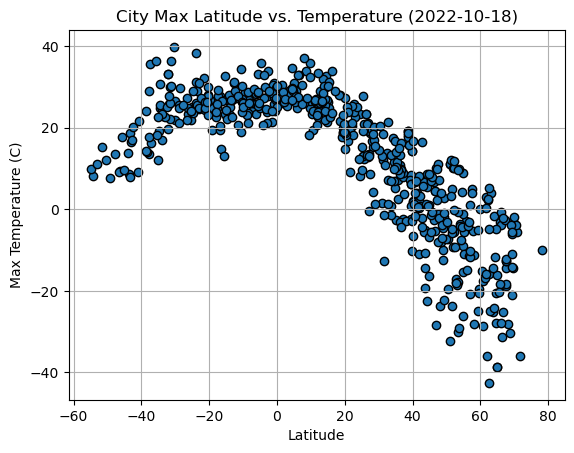

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

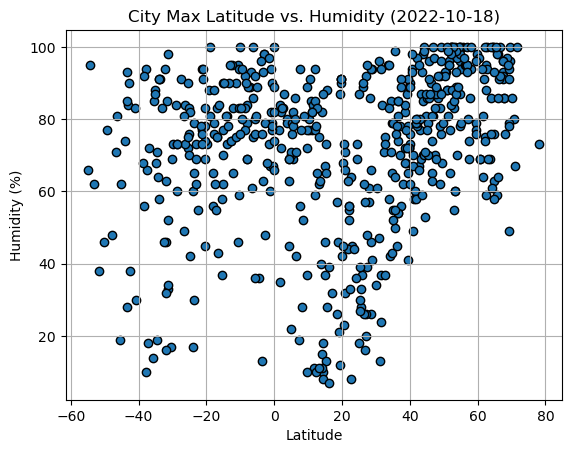

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

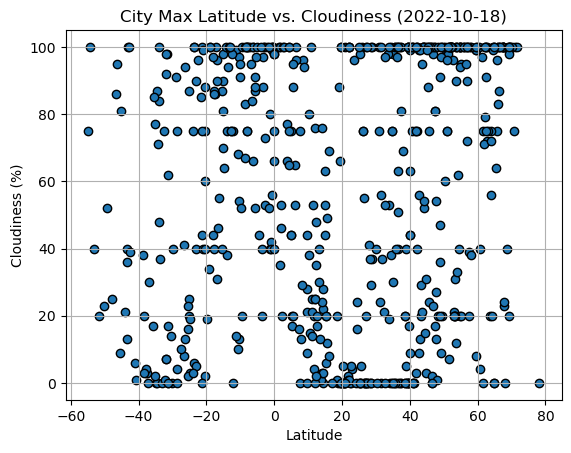

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

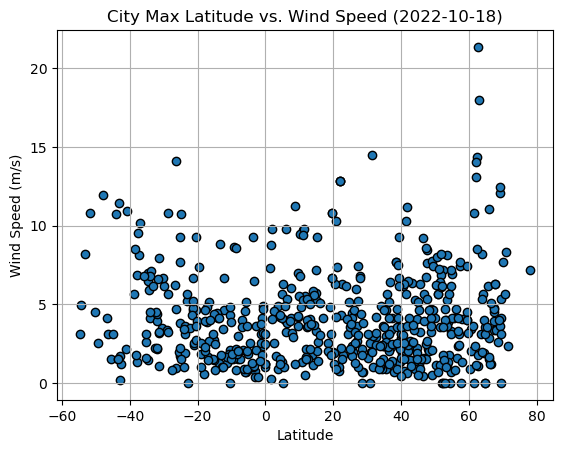

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linearRegression(x_values, y_values, annotate_x, annotate_y, title, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # xycoords parameter taken from Matplotlib documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
    plt.annotate(line_eq, (annotate_x, annotate_y), xycoords='axes fraction', fontsize=15, color="red")

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,21.32,67,63,5.73,CV,1706978688
1,fisterra,42.9049,-9.2629,16.53,77,13,1.47,ES,1706978796
3,qaqortoq,60.7167,-46.0333,-17.52,69,4,3.42,GL,1706978797
5,plastun,44.7561,136.2939,-16.41,81,3,4.05,RU,1706978797
6,hafar al-batin,28.4328,45.9708,15.32,26,0,0.00,SA,1706978545


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,16.40,84,100,1.74,AU,1706978796
4,port-aux-francais,-49.3500,70.2167,7.56,77,52,2.52,TF,1706978797
7,bredasdorp,-34.5322,20.0403,24.81,71,87,6.47,ZA,1706978407
10,puerto natales,-51.7236,-72.4875,15.25,38,20,10.80,CL,1706978384
11,edinburgh of the seven seas,-37.0676,-12.3116,16.21,72,30,10.14,SH,1706978798


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7355387137652736


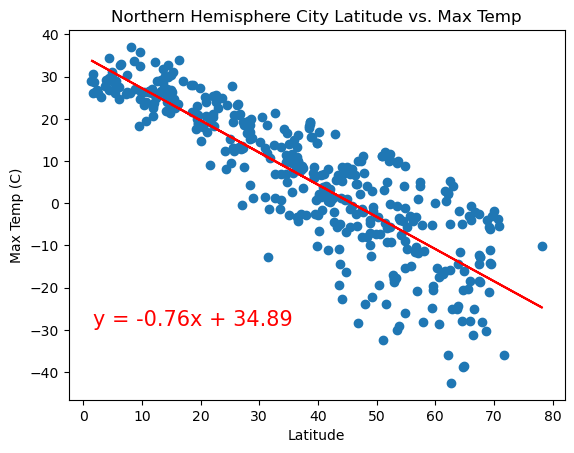

In [15]:
# Linear regression on Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Max Temp"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 0.05, 0.2, title, x_label, y_label)

The r-value is: 0.2978016530919312


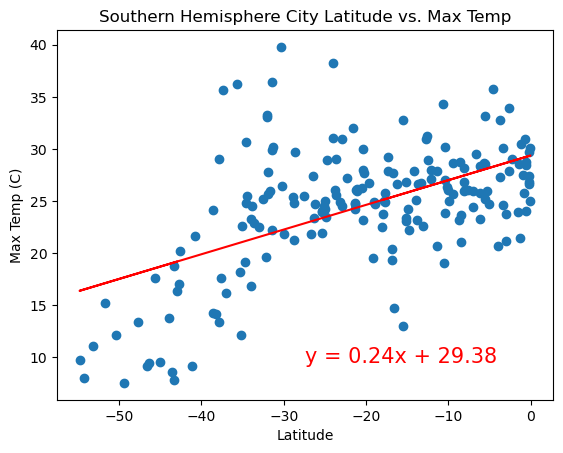

In [16]:
# Linear regression on Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Max Temp"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 0.5, 0.1, title, x_label, y_label)

**Discussion about the linear relationship:** The Northern Hemisphere model of random cities shows a strong negative linear path as the latitude moves toward higher latitudes the temperature decreases. This is confirmed by the r value which is 0.6856204686675623. The model for random cities in the Southern Hemisphere shows a somewhat strong correlation between latitude and temperature. As the data points move closer to the equator a significant number of the data points follow a positive linear path and the r value of 0.3061173519679404 which is less than .5 indicates the model is not as strong as the Northern Hemisphere model.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21373187591916867


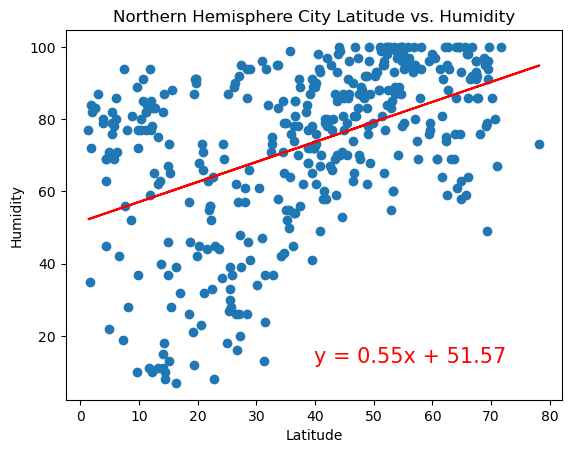

In [17]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Humidity"
x_label = "Latitude"
y_label = "Humidity"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 0.5, 0.1, title, x_label, y_label)

The r-value is: 0.08267817821577965


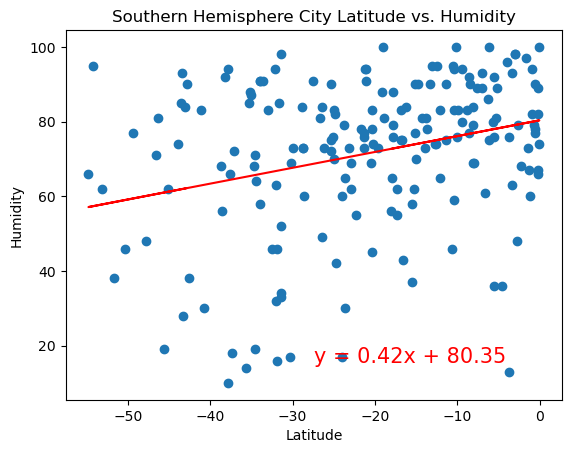

In [18]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Humidity"
x_label = "Latitude"
y_label = "Humidity"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 0.5, 0.1, title, x_label, y_label)

**Discussion about the linear relationship:** The Northern Hemisphere model of random cities shows a very little correlation between the latitude and the humidity. This is confirmed by the r value which is 0.21373187591916867. The Southern Hemisphere model of random cities shows a no relative correlation between the latitude and the temperature. This is confirmed by the r value which is 0.08267817821577965.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.102626179987376


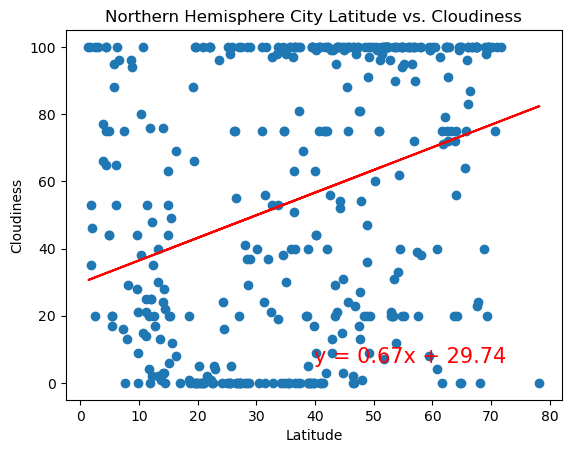

In [19]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Cloudiness"
x_label = "Latitude"
y_label = "Cloudiness"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 0.5, 0.1, title, x_label, y_label)

The r-value is: 0.16212597513045385


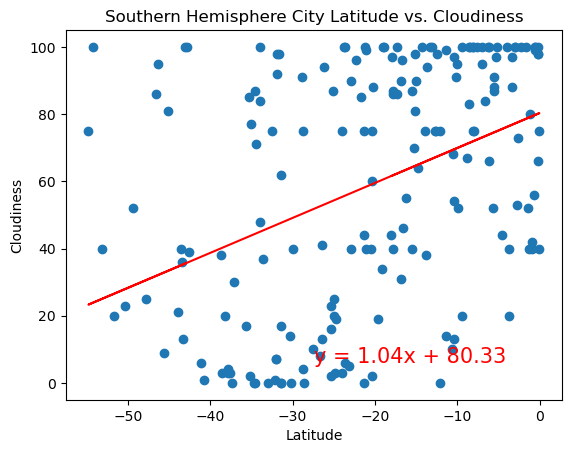

In [20]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Cloudiness"
x_label = "Latitude"
y_label = "Cloudiness"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 0.5, 0.1, title, x_label, y_label)

**Discussion about the linear relationship:** The datapoints for random cities in both models does not show any linear pattern between the latitude and cludiness for either hemisphere with the r values being very low at 0.102626179987376 for the Northern Hemisphere and an r value of 0.16212597513045385 for the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0008986382317618379


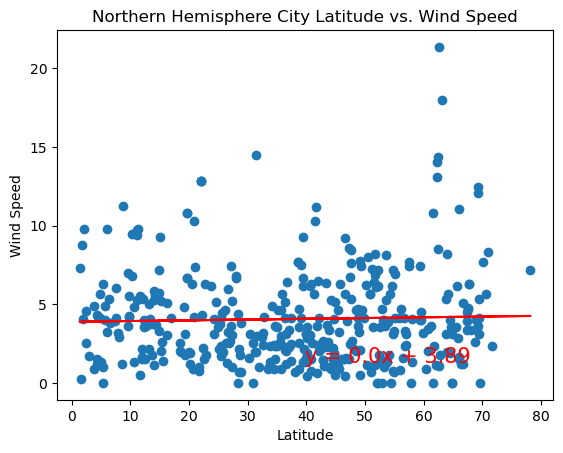

In [21]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Wind Speed"
x_label = "Latitude"
y_label = "Wind Speed"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 0.5, 0.1, title, x_label, y_label)

The r-value is: 0.12449790641835774


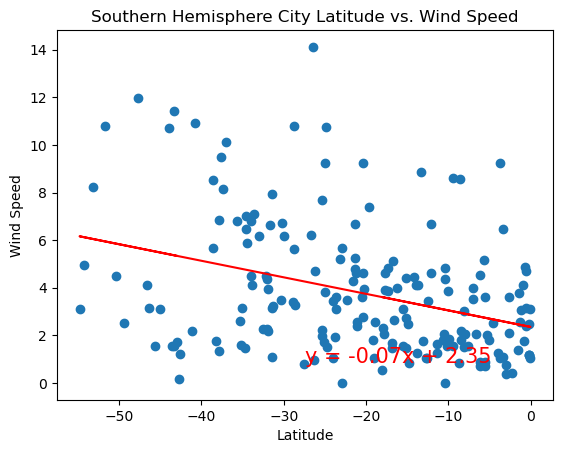

In [22]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Wind Speed"
x_label = "Latitude"
y_label = "Wind Speed"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 0.5, 0.1, title, x_label, y_label)

**Discussion about the linear relationship:** The datapoints for random cities in both models does not show any linear pattern between the latitude and wind speed for either hemisphere with the r values being very low at 0.0008986382317618379 for the Northern Hemisphere and an r value of 0.12449790641835774 for the Southern Hemisphere.